# Regression and Gauss-Markov assumptions

For this exercise, we recommend using `statsmodels`. 
Unless you haven't already installed it, you can do so by running
```bash
pip install statsmodels
```

*Make sure you have activated your `baml-venv` environment before doing so!*

## Imports and data loading

In [16]:
import sys
sys.path.append(r'C:\Users\tscha\BAML\.venv\Lib\site-packages')
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("gauss-markov.csv")
data.head(10)

,x1,x2,x3,y
0,-10.000000,13.593745,-86.999140,212.205325
1,-9.899497,6.640181,-56.314647,185.576520
2,-9.798995,11.001845,-77.000938,201.213858
3,-9.698492,9.754249,-70.062754,193.069946
4,-9.597990,12.606083,-81.346834,200.385392
5,-9.497487,12.596451,-82.014682,197.140433
6,-9.396985,5.579366,-50.366159,170.293901
7,-9.296482,3.062096,-39.131473,158.506427
8,-9.195980,6.999276,-55.432802,170.484964
9,-9.095477,11.487830,-75.768802,181.682421


## a)

We start by using the simple linear regression model
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3
$$

Using [``sm.OLS``](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html), compute optimal values for the parameters.

> Note: You may want to use ``sm.add_constant`` to add values for the intercept.



In [12]:
# Prepare input data
X = data[["x1","x2","x3"]] # TODO
y = data["y"]

In [18]:
# Fit a linear model with statsmodels
X = sm.add_constant(X)
model = sm.OLS(y, X) # TODO
results = model.fit()

In [19]:
# Show the results using the summary() function
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     128.6
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           4.52e-46
Time:                        20:06:28   Log-Likelihood:                -963.30
No. Observations:                 200   AIC:                             1935.
Df Residuals:                     196   BIC:                             1948.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.7239      6.241      5.083      0.0

Use the model to predict the $y$-values

In [20]:
predicted_values = results.predict(X)
print ("Predicted values of y: ", predicted_values) # TODO

Predicted values of y:  0      148.996850
1      124.721478
2      134.046305
3      132.125554
4      143.353080
          ...    
195      7.890651
196     16.697151
197     -0.963155
198     36.419962
199      8.690136
Length: 200, dtype: float64


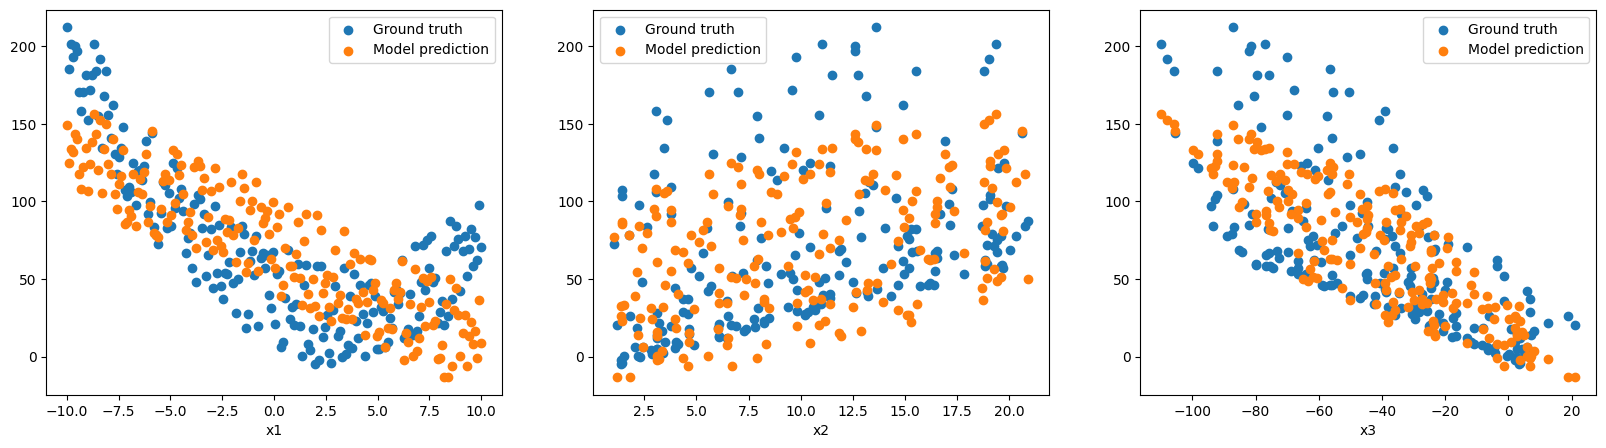

In [21]:
# Visualization of the predicted variables vs. the true variables
# NOTHING TO DO here
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax, variable_name in zip(axs, ["x1", "x2", "x3"]):
    ax.scatter(data[variable_name], data["y"], label="Ground truth")
    ax.scatter(data[variable_name], predicted_values, label="Model prediction")
    ax.legend()
    ax.set_xlabel(variable_name)

## b)

Compute the residuals $e = \hat{y} - y$ of the resulting model.

In [23]:
residuals = y - predicted_values
print (residuals) # TODO

0      63.208475
1      60.855042
2      67.167553
3      60.944392
4      57.032312
         ...    
195    50.229662
196    60.626433
197    63.031903
198    61.534015
199    61.681138
Length: 200, dtype: float64


Plot the residuals over the input variables $x_1$ and $x_2$. What do you observe?

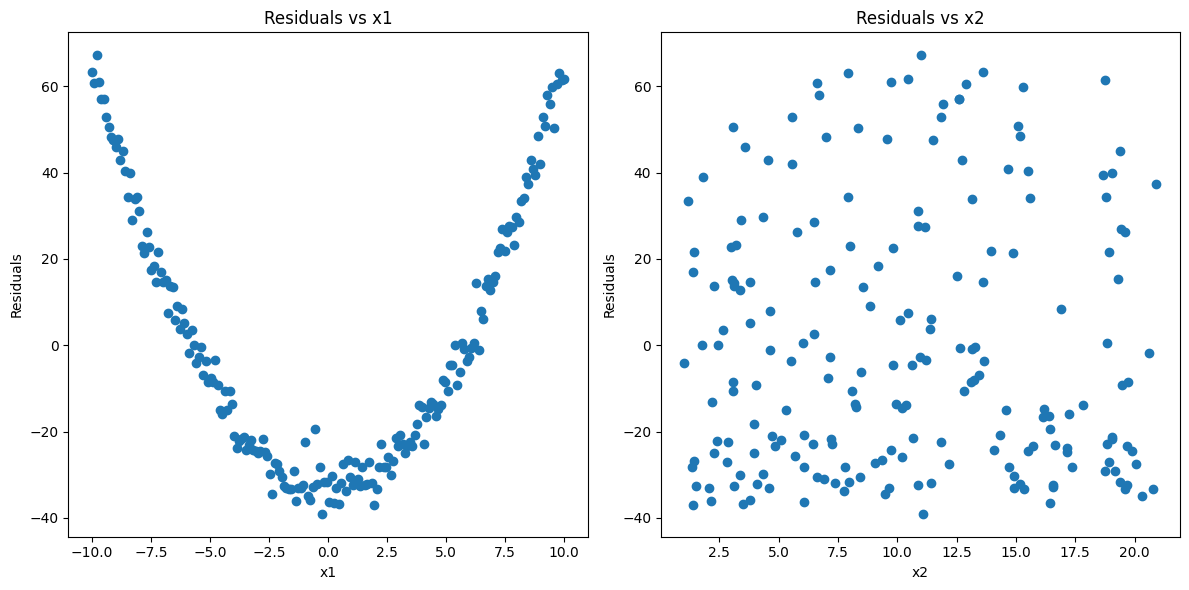

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(data["x1"], residuals)
plt.xlabel("x1")
plt.ylabel("Residuals")
plt.title("Residuals vs x1")

plt.subplot(1, 2, 2)
plt.scatter(data["x2"], residuals)
plt.xlabel("x2")
plt.ylabel("Residuals")
plt.title("Residuals vs x2")

plt.tight_layout()
plt.show()


Using a White test ([`statsmodels.stats.diagnostic.het_white`](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_white.html)), show that the linear model does not satisfy homoscedasticity.

In [31]:
from statsmodels.stats.diagnostic import het_white
# White test for heteroscedasticity
# Perform the White test
white_test = het_white(residuals, X)

# Extract the test statistic and p-value
white_test_stat, white_test_p_value = white_test[:2]
print("White test statistic:", white_test_stat)
print("White test p-value:", white_test_p_value)

# Interpretation
if white_test_p_value < 0.01:
    print("Reject the null hypothesis of homoscedasticity (evidence of heteroscedasticity).")
else:
    print("Fail to reject the null hypothesis of homoscedasticity (no evidence of heteroscedasticity).")

White test statistic: 73.74388209470568
White test p-value: 2.7960490474646e-12
Reject the null hypothesis of homoscedasticity (evidence of heteroscedasticity).


## c)

Consider the alternative model
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_1^2
$$

Compute the optimal parameter values. You should observe that the $R^2$ value improves drastically over the previous model.

In [34]:
# Prepare input data
# Add the new feature x1^2
data["x1_squared"] = data["x1"] ** 2

# Prepare feature matrix X and target variable y
XNeu = data[["x1", "x2", "x3", "x1_squared"]]
yNeu = data["y"]

XNeu = sm.add_constant(XNeu)

# Fit a linear model
model = sm.OLS(yNeu, XNeu)
results = model.fit()

# Display the model summary for optimal parameters
print(results.summary())

# Calculate the R-squared value to check the improvement in model fit
print("R-squared value:", results.rsquared)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.329e+05
Date:                Sun, 10 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:45:28   Log-Likelihood:                -280.99
No. Observations:                 200   AIC:                             572.0
Df Residuals:                     195   BIC:                             588.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9063      0.217     18.032      0.0

Although this model gives a very good fit of the data, there is another problem.
Use the Variance inflation factor ([`statsmodels.stats.outliers_influence.variance_inflation_factor`](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)) to check whether the variables are dependent.

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Check for multicollinearity using Variance Inflation Factor (VIF)
# VIF requires each feature column without a constant, so we calculate it for the matrix X without the intercept.
vif_data = pd.DataFrame()
vif_data["Feature"] = XNeu.columns
vif_data["VIF"] = [vif(XNeu.values, i) for i in range(XNeu.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif_data)

Variance Inflation Factors (VIF):
      Feature          VIF
0       const     9.411117
1          x1   355.350514
2          x2   752.466159
3          x3  1080.271769
4  x1_squared     1.011315


## d)
Consider a third model:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1^2
$$

Compute the optimal parameter values.

In [39]:
# Prepare input data

# Prepare feature matrix X and target variable y
XDrei = data[["x1", "x2", "x1_squared"]]
yDrei = data["y"]

XDrei = sm.add_constant(XDrei)

# Fit a linear model
model = sm.OLS(yDrei, XDrei)
results = model.fit()

# Display the model summary for optimal parameters
print(results.summary())

# Calculate the R-squared value to check the improvement in model fit
print("R-squared value:", results.rsquared)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.062e+05
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          2.26e-314
Time:                        20:51:05   Log-Likelihood:                -332.70
No. Observations:                 200   AIC:                             673.4
Df Residuals:                     196   BIC:                             686.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3017      0.214     10.758      0.0

Check if the model has multicollinear input variables using the VIF.

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Check for multicollinearity using Variance Inflation Factor (VIF)
# VIF requires each feature column without a constant, so we calculate it for the matrix X without the intercept.
vif_data = pd.DataFrame()
vif_data["Feature"] = XDrei.columns
vif_data["VIF"] = [vif(XDrei.values, i) for i in range(XDrei.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif_data)

Variance Inflation Factors (VIF):
      Feature       VIF
0       const  5.501157
1          x1  1.000667
2          x2  1.000885
3  x1_squared  1.000218


Check if the model satisfies the homoscedasticity assumption using the White test.

In [42]:
from statsmodels.stats.diagnostic import het_white
predicted_valuesDrei = results.predict(XDrei)
residuals = y - predicted_valuesDrei
# White test for heteroscedasticity
# Perform the White test
white_test = het_white(residuals, XDrei)

# Extract the test statistic and p-value
white_test_stat, white_test_p_value = white_test[:2]
print("White test statistic:", white_test_stat)
print("White test p-value:", white_test_p_value)

# Interpretation
if white_test_p_value < 0.01:
    print("Reject the null hypothesis of homoscedasticity (evidence of heteroscedasticity).")
else:
    print("Fail to reject the null hypothesis of homoscedasticity (no evidence of heteroscedasticity).")

White test statistic: 4.314943637492608
White test p-value: 0.8276492158992901
Fail to reject the null hypothesis of homoscedasticity (no evidence of heteroscedasticity).


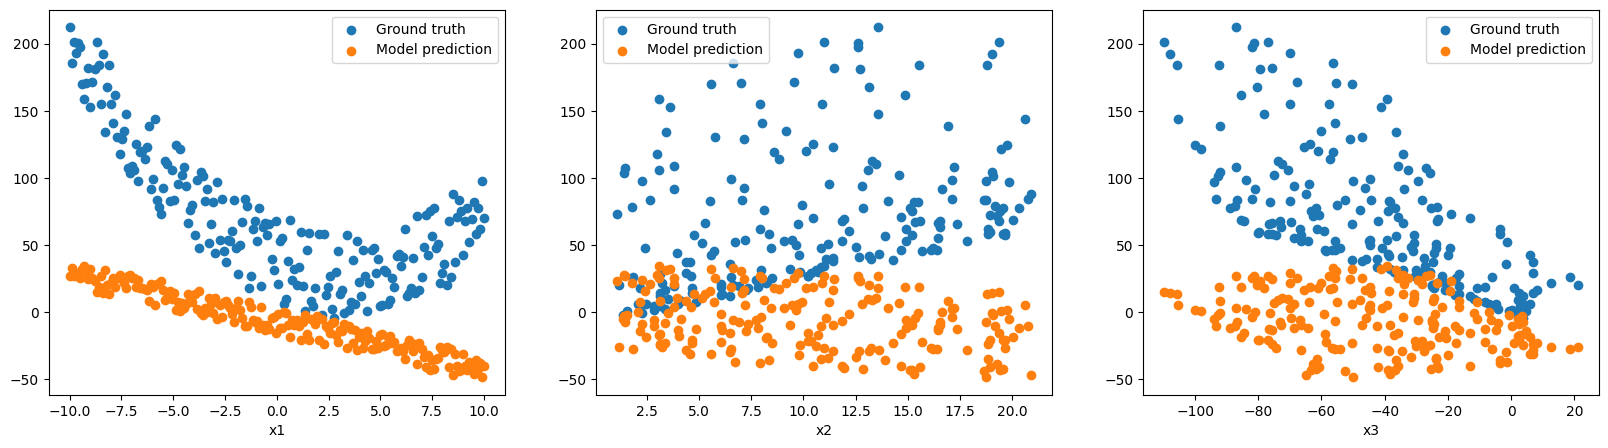

In [43]:
# Visualization of the predicted variables vs. the true variables
# NOTHING TO DO here
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax, variable_name in zip(axs, ["x1", "x2", "x3"]):
    ax.scatter(data[variable_name], data["y"], label="Ground truth")
    ax.scatter(data[variable_name], model.predict(results.params, X), label="Model prediction")
    ax.legend()
    ax.set_xlabel(variable_name)